# Decision Trees

Decison Tree models are nof affected by the scaling of the dataset, since a node on the tree only splits the dataset in 2 parts comparing a feature to a threshold value.

## Setup

In [1]:
import nbimporter
import DataProfiling as dp
import DataBalancing as db
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
import ds_functions as ds

data1 = pd.read_csv('Datasets/heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')
data2 = pd.read_csv('Datasets/qsar_oral_toxicity.csv', sep=';', decimal='.')

Importing Jupyter notebook from DataProfiling.ipynb
Importing Jupyter notebook from DataBalancing.ipynb


## Heart Failure Dataset

Sensivity é mais importante que a specificity neste dataset pois a classificação de positivos é uma prioridade

### Original Dataset

Best Tree (Accuracy = 0.91)

>
*   min_samples_leaf = 0.01
*   criteria: entropy
*   depth = 25
*   min_impurity_decrease = 0.01





<Figure size 600x450 with 0 Axes>

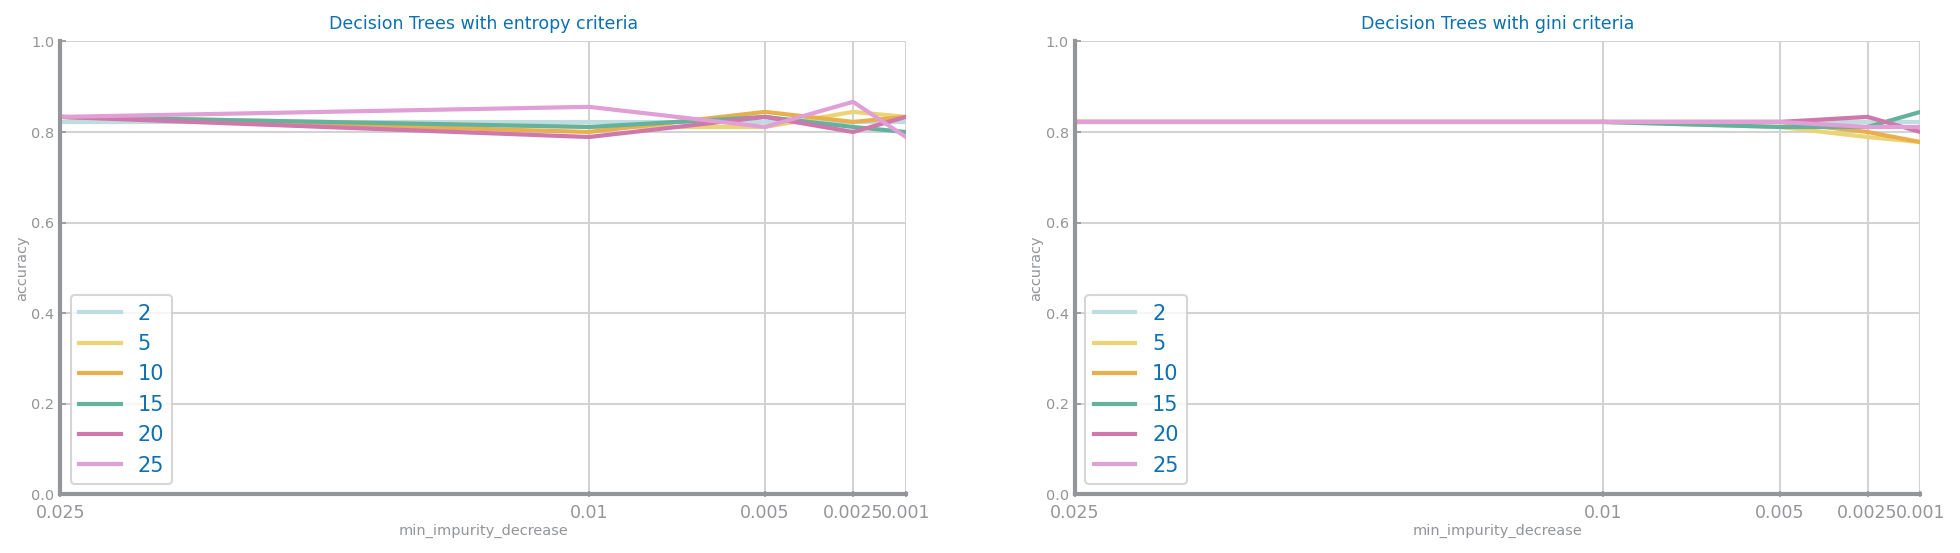

Best results achieved with entropy criteria, depth=25 and min_impurity_decrease=0.00 ==> accuracy=0.87


In [2]:
unbal  = data1.copy()

y: np.ndarray = unbal.pop('DEATH_EVENT').values
X: np.ndarray = unbal.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y, random_state = 10)

min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=0.01, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

In [8]:
from sklearn.tree import export_graphviz
import graphviz

#dot_data = export_graphviz(tree, out_file='dtree.dot', filled=True, rounded=True, special_characters=True)
#graph = graphviz.Source(dot_data)
#graph.render('image', view=True)
# Convert to png
#from subprocess import call
#call(['pydot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

#plt.figure(figsize = (14, 18))
#plt.imshow(plt.imread('dtree.png'))
#plt.axis('off')
#plt.show()

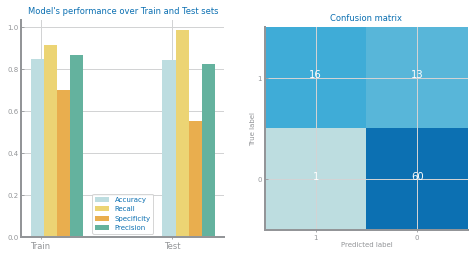

In [ ]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### Dataset without outliers





In [1]:
from scipy import stats

data1 = pd.read_csv('drive/My Drive/CD/heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')
data1 = data1[(np.abs(stats.zscore(data1)) < 3).all(axis=1)]

y: np.ndarray = data1.pop('DEATH_EVENT').values
X: np.ndarray = data1.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=0.01, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

NameError: ignored

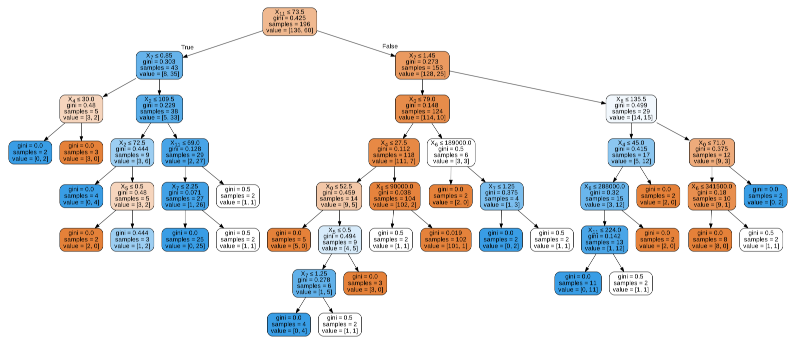

In [ ]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file='dtree.dot', filled=True, rounded=True, special_characters=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('dtree.png'))
plt.axis('off')
plt.show()

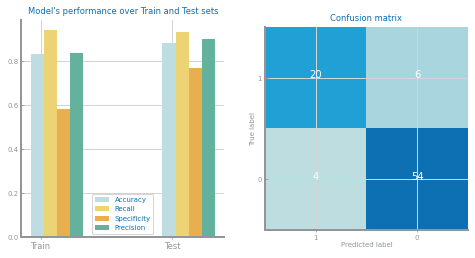

In [ ]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### Balanced Dataset (SMOTE)







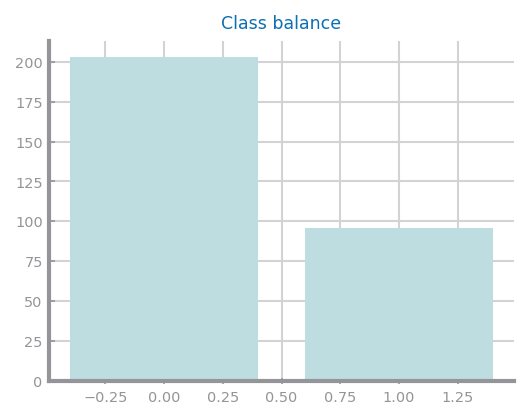

Minority class: 96
Majority class: 203
Proportion: 0.47 : 1


In [ ]:
unbal = pd.read_csv('drive/My Drive/CD/heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')
target_count = unbal['DEATH_EVENT'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

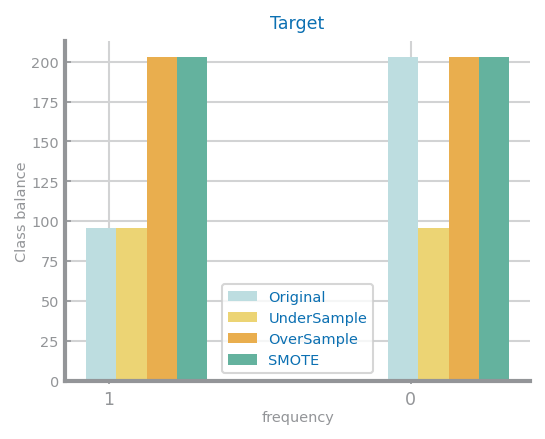

In [ ]:
import ds_functions as ds
from imblearn.over_sampling import SMOTE

unbal = pd.read_csv('drive/My Drive/CD/heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal['DEATH_EVENT'] == min_class]
df_class_max = unbal[unbal['DEATH_EVENT'] != min_class]

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(sampling_strategy='minority', random_state=RANDOM_STATE)
y = unbal.pop('DEATH_EVENT').values
X = unbal.values
smote_X, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

fig = plt.figure()
ds.multiple_bar_chart([target_count.index[ind_min_class], target_count.index[1-ind_min_class]], values,
                      title='Target', xlabel='frequency', ylabel='Class balance')
plt.show()

<Figure size 432x288 with 0 Axes>

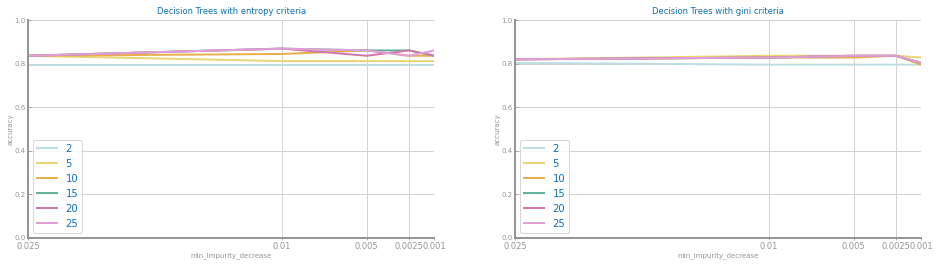

Best results achieved with entropy criteria, depth=15 and min_impurity_decrease=0.01 ==> accuracy=0.87


In [ ]:
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42
unbal = pd.read_csv('drive/My Drive/CD/heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')
smote = SMOTE(sampling_strategy='minority', random_state=RANDOM_STATE)
y = unbal.pop('DEATH_EVENT').values
X = unbal.values
smote_X, smote_y = smote.fit_sample(X, y)
labels = pd.unique(smote_y)

trnX, tstX, trnY, tstY = train_test_split(smote_X, smote_y, train_size=0.7, stratify=smote_y)

# --------------------------------------------------

# unbal = pd.read_csv('drive/My Drive/CD/qsar_oral_toxicity.csv', sep=';', decimal='.')
# target_count = unbal[unbal.columns[-1]].value_counts()
# min_class = target_count.idxmin()
# ind_min_class = target_count.index.get_loc(min_class)

# df_class_min = unbal[unbal[unbal.columns[-1]] == min_class]
# df_class_max = unbal[unbal[unbal.columns[-1]] != min_class]

# # # Undersampling
# # df_under = df_class_max.sample(len(df_class_min))
# # bal = df_under.append(df_class_min)

# # Oversampling
# df_over = df_class_min.sample(len(df_class_max), replace=True)
# bal = df_over.append(df_class_max)


# target_count = bal[bal.columns[-1]].value_counts()
# plt.figure(figsize=(7, 3), dpi=150)
# plt.title('Class balance')
# plt.bar(target_count.index, target_count.values)
# plt.show()

# print('Minority class:', target_count[ind_min_class])
# print('Majority class:', target_count[1-ind_min_class])
# print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

# y = bal.pop(bal.columns[-1]).values
# X = bal.values
# labels = pd.unique(y)

# trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)


# -----------------------------------------------



min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=0.01, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

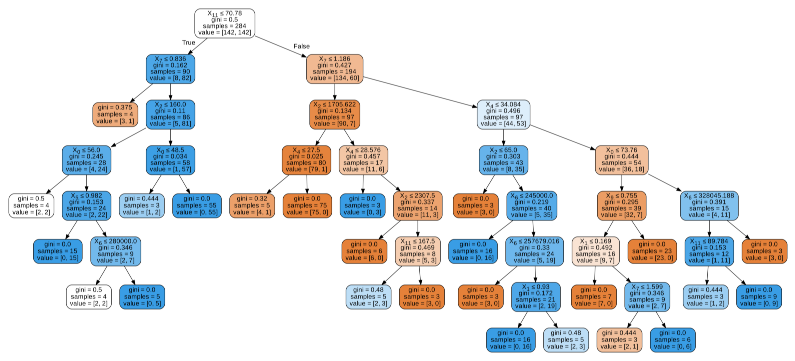

In [ ]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file='dtree.dot', filled=True, rounded=True, special_characters=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

fig = plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('dtree.png'))
plt.axis('off')
plt.show()
# fig.savefig('my_figure.png')
# from IPython.display import Image
# Image('my_figure.png')

**A recall (sensivity) e a specificity não estão trocadas?**

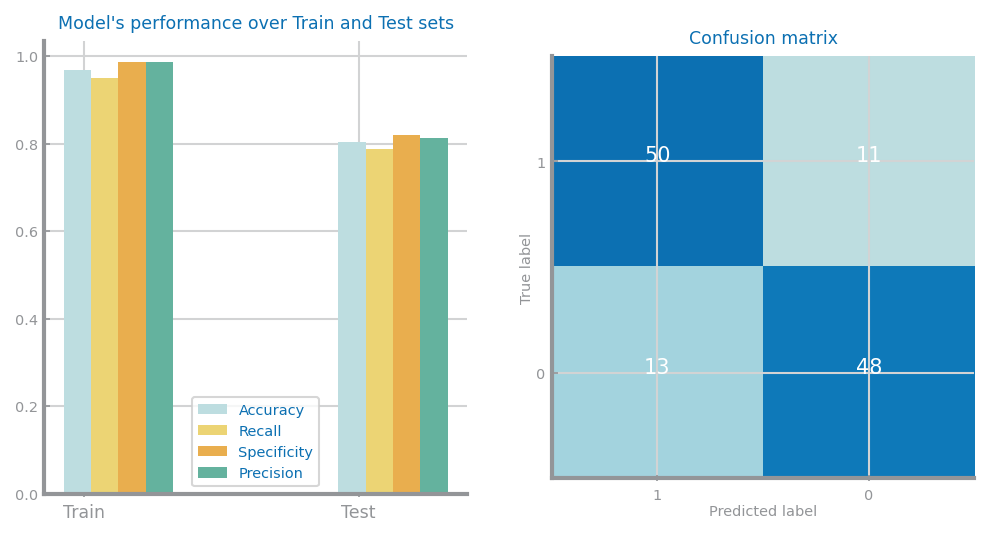

In [ ]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

## Oral Toxicity Dataset

Sensivity é mais importante que a specificity neste dataset pois a classificação de positivos é uma prioridade

### Original Dataset





<Figure size 432x288 with 0 Axes>

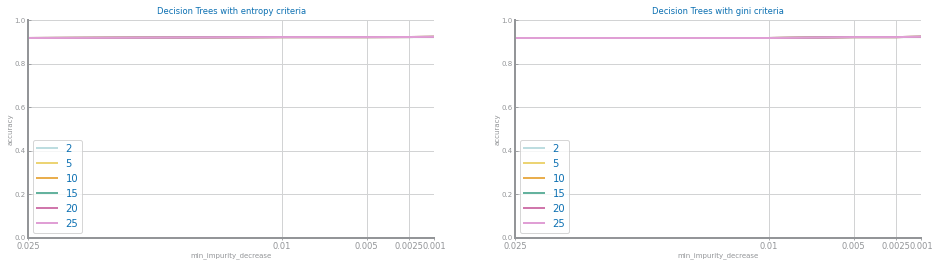

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.00 ==> accuracy=0.92


In [ ]:
data2 = pd.read_csv('drive/My Drive/CD/qsar_oral_toxicity.csv', sep=';', decimal='.')

y: np.ndarray = data2.pop(data2.columns[-1]).values
X: np.ndarray = data2.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=0.005, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

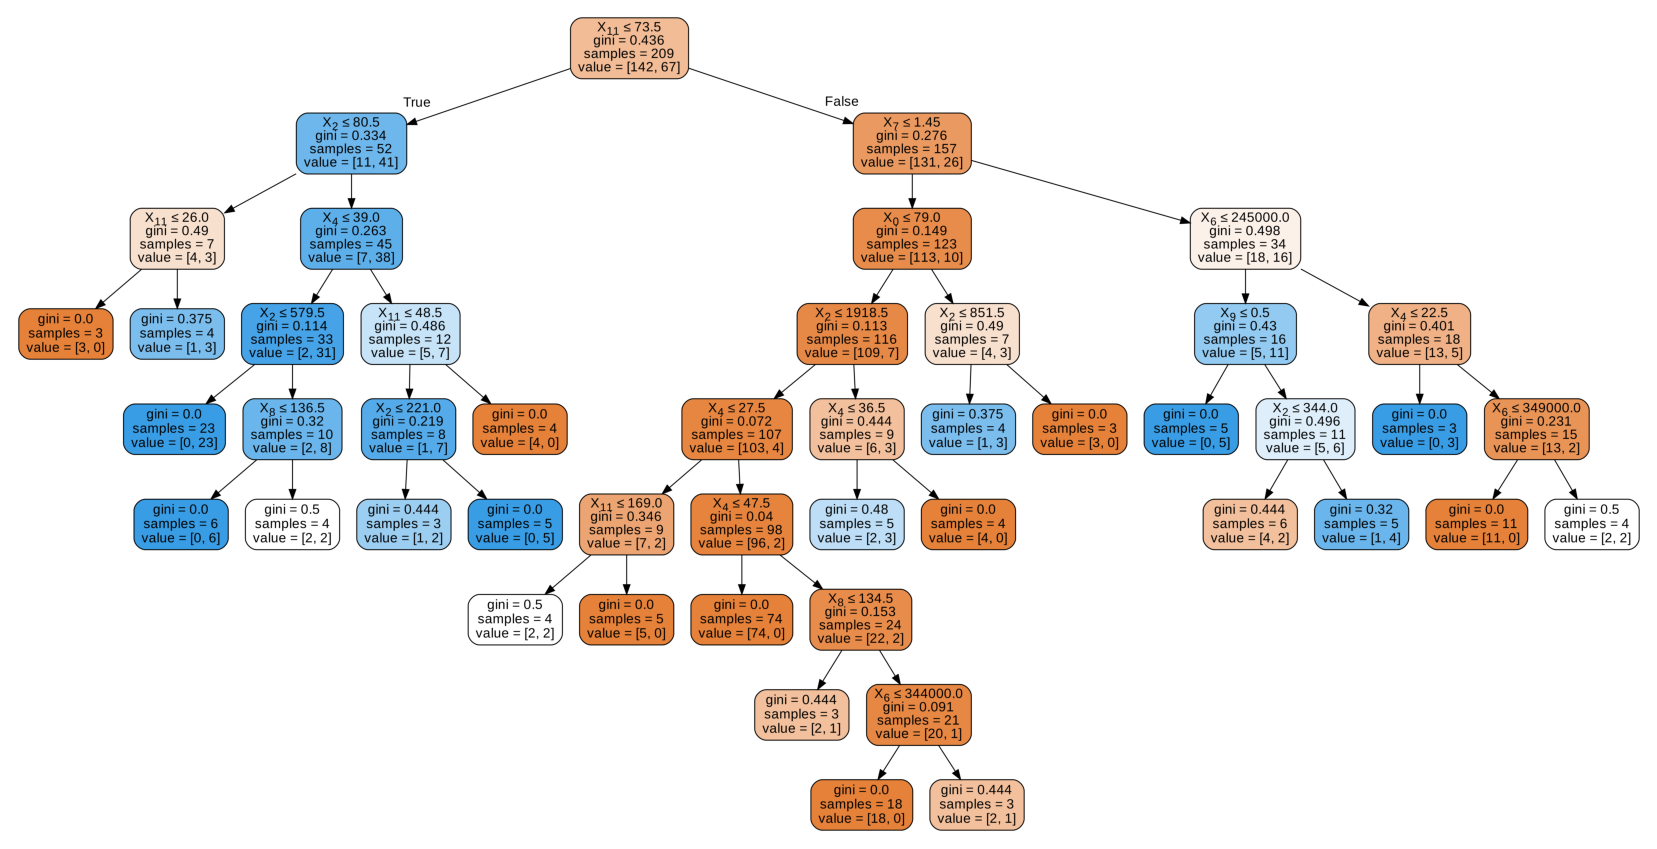

In [ ]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file='dtree.dot', filled=True, rounded=True, special_characters=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('dtree.png'))
plt.axis('off')
plt.show()

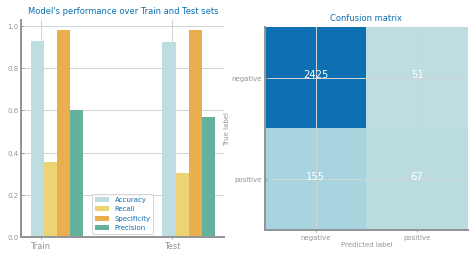

In [ ]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### Balanced Dataset





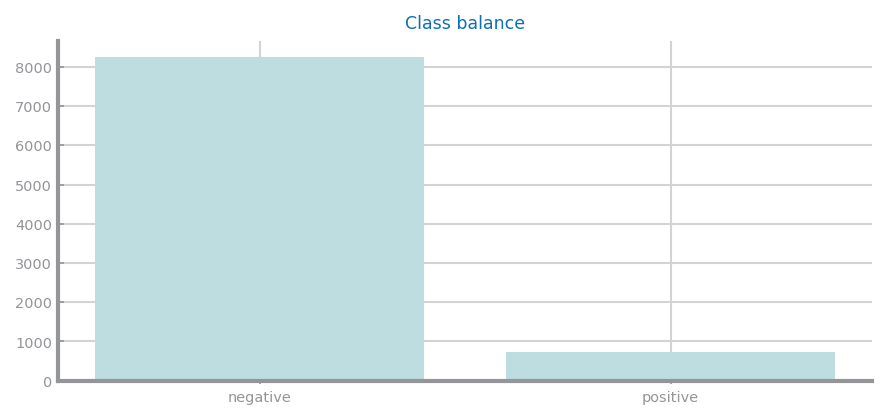

Minority class: 741
Majority class: 8250
Proportion: 0.09 : 1


In [ ]:
import matplotlib.pyplot as plt

unbal = pd.read_csv('drive/My Drive/CD/qsar_oral_toxicity.csv', sep=';', decimal='.')
target_count = unbal[unbal.columns[-1]].value_counts()
plt.figure(figsize=(7, 3), dpi=150)
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

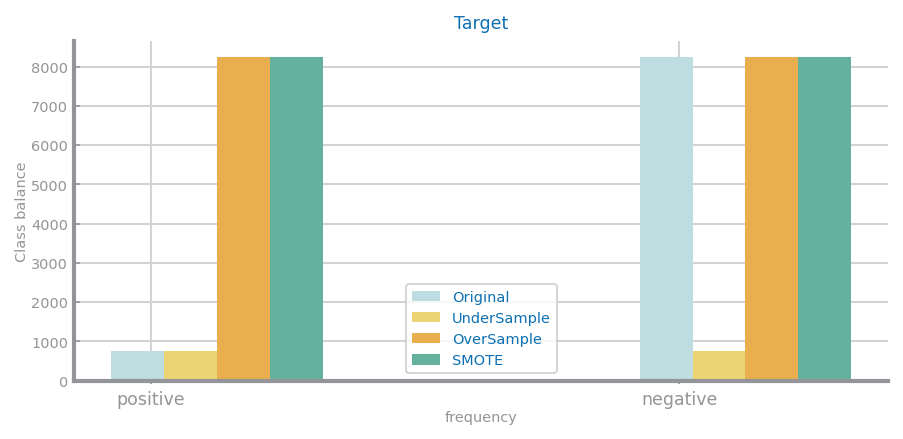

In [ ]:
import ds_functions as ds
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal[unbal.columns[-1]] == min_class]
df_class_max = unbal[unbal[unbal.columns[-1]] != min_class]

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(sampling_strategy='minority', random_state=RANDOM_STATE)
y = unbal.pop(unbal.columns[-1]).values
X = unbal.values
smote_X, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

fig = plt.figure(figsize=(7, 3), dpi=150)
ds.multiple_bar_chart([target_count.index[ind_min_class], target_count.index[1-ind_min_class]], values,
                      title='Target', xlabel='frequency', ylabel='Class balance')
plt.show()

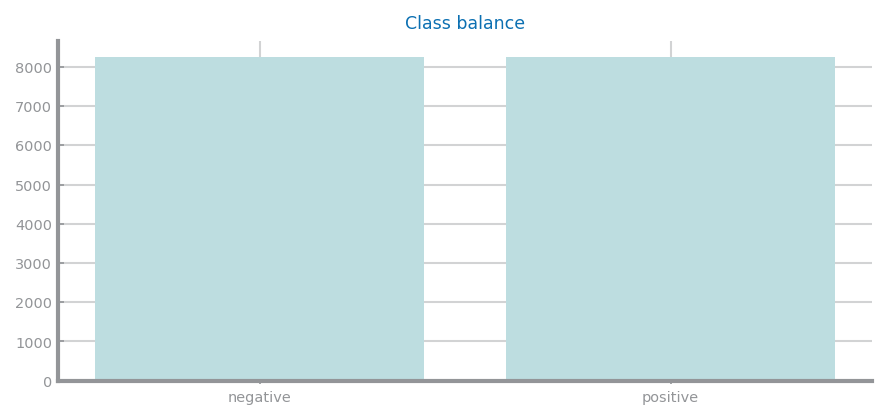

Minority class: 8250
Majority class: 8250
Proportion: 1.0 : 1


<Figure size 432x288 with 0 Axes>

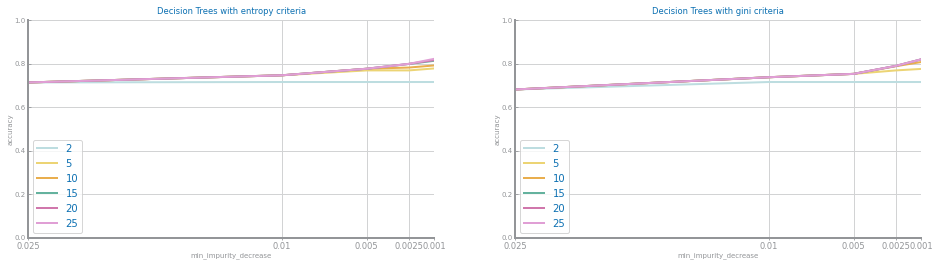

Best results achieved with entropy criteria, depth=25 and min_impurity_decrease=0.00 ==> accuracy=0.82


In [ ]:
from imblearn.over_sampling import SMOTE

unbal = pd.read_csv('drive/My Drive/CD/qsar_oral_toxicity.csv', sep=';', decimal='.')
target_count = unbal[unbal.columns[-1]].value_counts()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

df_class_min = unbal[unbal[unbal.columns[-1]] == min_class]
df_class_max = unbal[unbal[unbal.columns[-1]] != min_class]

# # Undersampling
# df_under = df_class_max.sample(len(df_class_min))
# bal = df_under.append(df_class_min)

# Oversampling
df_over = df_class_min.sample(len(df_class_max), replace=True)
bal = df_over.append(df_class_max)

# SMOTE
# RANDOM_STATE = 42
# smote = SMOTE(sampling_strategy='minority', random_state=RANDOM_STATE)
# y = unbal.pop(unbal.columns[-1]).values
# X = unbal.values
# smote_X, smote_y = smote.fit_sample(X, y)
# smote_target_count = pd.Series(smote_y).value_counts()
# labels = pd.unique(smote_y)
# print(smote_target_count)

target_count = bal[bal.columns[-1]].value_counts()
plt.figure(figsize=(7, 3), dpi=150)
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

y = bal.pop(bal.columns[-1]).values
X = bal.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=0.005, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

In [ ]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file='dtree.dot', filled=True, rounded=True, special_characters=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('dtree.png'))
plt.axis('off')
plt.show()

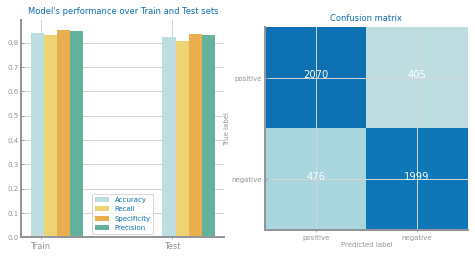

In [ ]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)